## 2022-1 탐색적자료분석 4장 레포트

### 202115789 통계학과 김지우

# Problem 1

표준정규분포($N(0,1)$) 

자유도가 2인 카이제곱분포($(\chi(2))^2$)

베타분포($Beta(10,2)$) 에서 각각 의사 난수를 100개씩 뽑아서 다음에 답하시오.

(1) 각각 히스토그램을 그리시오.

(2) 문자 값 전시를 하고 mid(H), mid(E), $\dots$ 등의 순위를 확인하시오.

## `1` 각각 히스토그램을 그리시오.

### 표준정규분포 히스토그램

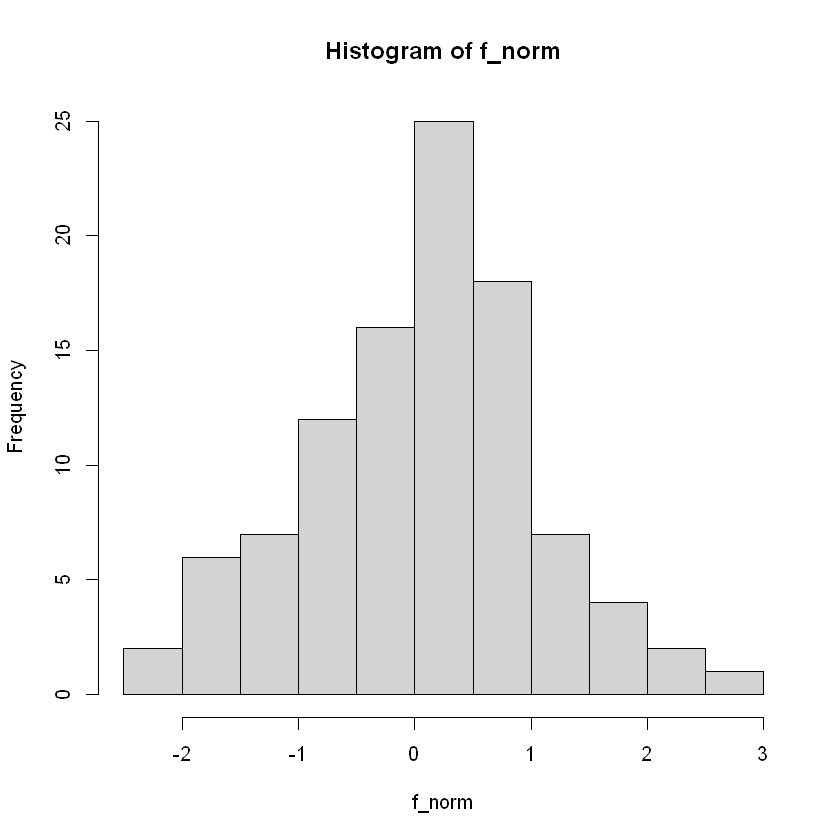

In [1]:
f_norm = rnorm(100, mean =0, sd = 1)
hist(f_norm)

- 위의 히스토그램은 표준정규분포에서 100개의 난수를 추출한 것으로 대략 대칭이다.

### 카이제곱분포 히스토그램

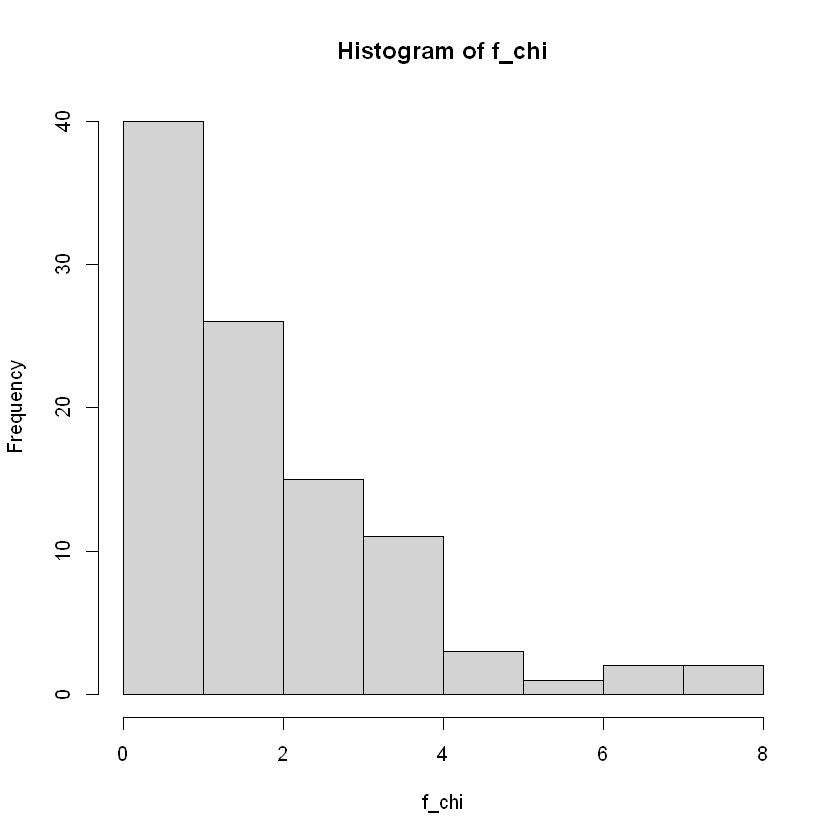

In [2]:
f_chi = rchisq(100, 2)
hist(f_chi)

In [3]:
mean(f_chi)

[1] 1.746839

- 위의 히스토그램은 자유도가 2인 카이제곱분포에서 100개의 난수를 추출한 것으로 오른쪽 꼬리가 길다.

### 베타분포 히스토그램

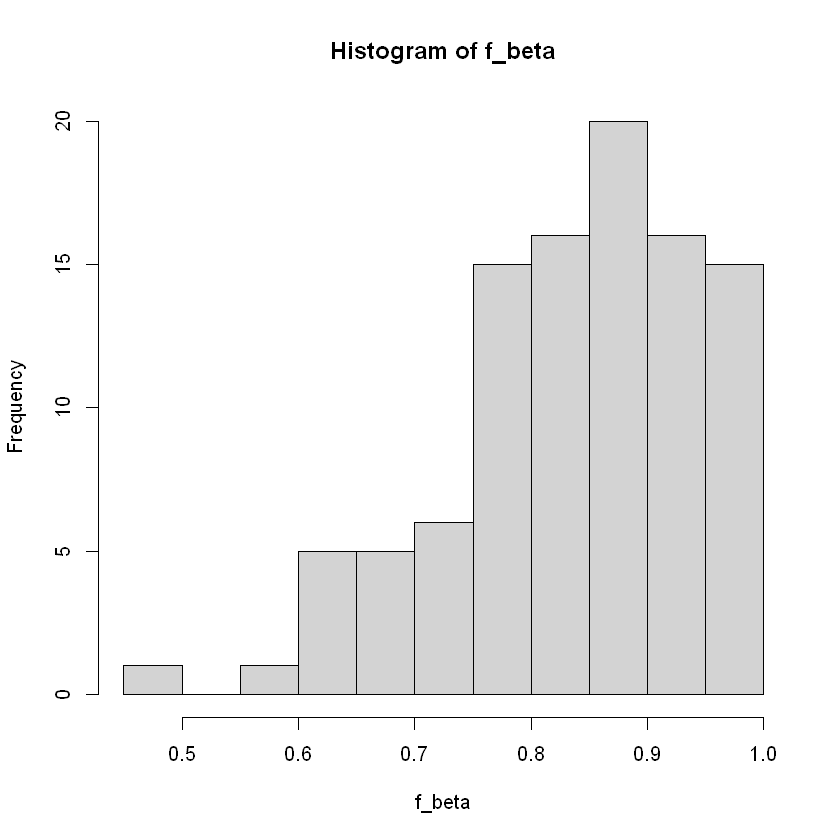

In [9]:
f_beta = rbeta(100, 10, 2)
hist(f_beta)

- 위 히스토그램은 베타분포 $B(10, 2)$에서 100개의 난수를 추출한 것으로 왼쪽 꼬리가 길다.

## `2` 문자 값 전시를 하고 mid(H), mid(E), $\dots$ 등의 순위를 확인하시오.

- 벡터를 입력하면 문자 값 전시와 각 분위수 별 중앙값울 출력하는 함수를 생성한다.

In [5]:
text_value = function(f){
    c1 = quantile(f, c(1/2, 1/4, 1/8, 1/16, 0), type = 8)
    c2 = quantile(f, c(1/2, 3/4, 7/8, 15/16, 1), type = 8)
    c3 = (c1+c2)/2
    c4 = c2 - c1
    c4[1] = NaN
    
    mat = cbind(c1, c2, c3, c4)
    rownames(mat) = c('중간값 M', '4분위수 H', '8분위수 E', '16분위수 D', '끝 값')
    colnames(mat) = c('수치요약', '수치요약', '중앙 mid', '산포 spr')
    

    return(list(mat, 
                paste('M = ', mat['중간값 M','중앙 mid']),
                paste('mid(H) = ', mat['4분위수 H', '중앙 mid']),
                paste('mid(E) = ', mat['8분위수 E', '중앙 mid']),
                paste('mid(D) = ', mat['16분위수 D', '중앙 mid'])))
}

### 표준정규분포 문자 값 전시 및 순위 확인

In [6]:
f_norm_text = text_value(f_norm) 
f_norm_text

,수치요약,수치요약,중앙 mid,산포 spr
중간값 M,0.1900072,0.1900072,0.190007225,NaN
4분위수 H,-0.6504153,0.6322254,-0.009094936,1.282641
8분위수 E,-1.1483248,1.1083253,-0.019999721,2.256650
16분위수 D,-1.6401073,1.5885683,-0.025769513,3.228676
끝 값,-2.4643374,2.7723809,0.154021753,5.236718


$M \approx mid(H) \approx mid(E) \approx mid(D)$로 거의 같다.

### 카이제곱분포 문자 값 전시 및 순위 확인

In [7]:
f_chi_text = text_value(f_chi)
f_chi_text

,수치요약,수치요약,중앙 mid,산포 spr
중간값 M,1.33476622,1.334766,1.334766,NaN
4분위수 H,0.60642073,2.387306,1.496863,1.780885
8분위수 E,0.26087751,3.485724,1.873301,3.224846
16분위수 D,0.19005667,4.522066,2.356061,4.332009
끝 값,0.01330666,7.406784,3.710045,7.393477


$M < mid(H) < mid(E) < mid(D)$ 이다.

### 베타분포 문자 값 전시 및 순위 확인

In [10]:
f_beta_text = text_value(f_beta)
f_beta_text

,수치요약,수치요약,중앙 mid,산포 spr
중간값 M,0.8527933,0.8527933,0.8527933,NaN
4분위수 H,0.7814058,0.9217688,0.8515873,0.1403630
8분위수 E,0.7023227,0.9582182,0.8302704,0.2558955
16분위수 D,0.6445906,0.9711784,0.8078845,0.3265878
끝 값,0.4716138,0.9919816,0.7317977,0.5203678


$M > mid(H) > mid(E) > mid(D)$ 이다.

## 결론

표준정규분포($N(0,1)$)와 같이 분포가 대략 대칭인 경우 $M = mid(H) = mid(E) = mid(D)$

자유도가 2인 카이제곱분포($(\chi(2))^2$)와 같이 오른쪽 꼬리가 긴 경우 $M < mid(H) < mid(E) < mid(D)$

베타분포($Beta(10,2)$)와 같이 왼쪽 꼬리가 긴 경우 $M > mid(H) > mid(E) > mid(D)$

# Problem 2

## 균일분포 ($\mu -\alpha, \mu + \alpha$)에서 문자값 전시를 증명하여 보이시오

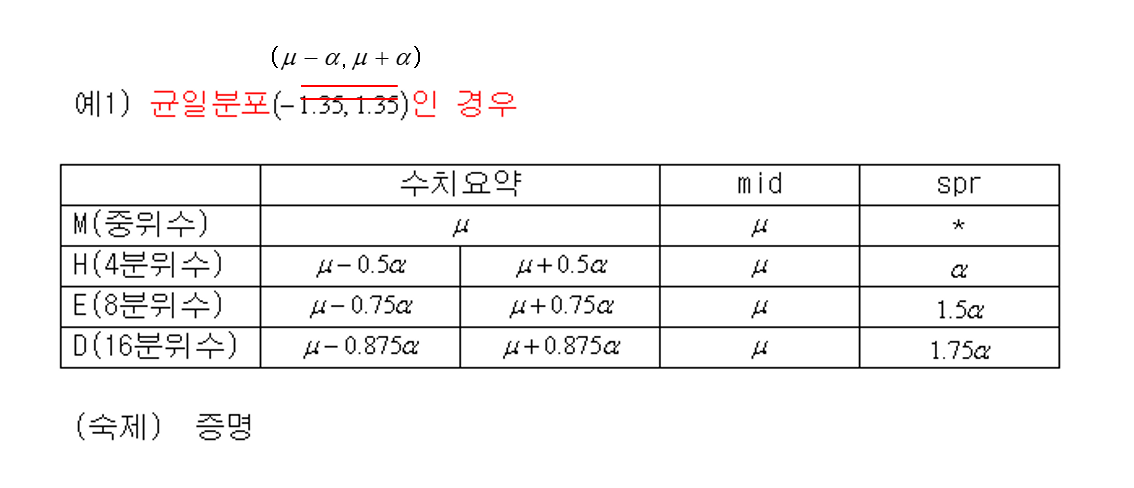

균일분포는 해당 구간에서 동일한 확률밀도를 가진다는 점을 이용하여 문자값 전시를 할 수 있다.

- `M(중앙값)` : 균일분포는 완벽한 좌우대칭이므로 $M$(중위수)의 수치요약은 $\mu$이다. 단일 값이므로 산포는 없다.

- `H(4분위수)` : $\dfrac{2\alpha}{4} = 0.5\alpha$이므로 수치요약은 $(\mu-\alpha + 0.5\alpha, \mu+\alpha -0.5 \alpha)=(\mu-0.5\alpha, \mu+0.5 \alpha)$이다. 균일분포이므로 중앙값은 $\mu$이고,
산포는 $\mu+0.5 \alpha - (\mu-0.5\alpha) = \alpha$ 이다.

- `E(8분위수)` : $\dfrac{2\alpha}{8} = 0.25\alpha$이므로 수치요약은 $(\mu-\alpha + 0.25\alpha, \mu+\alpha - 0.25 \alpha) = (\mu-0.75\alpha, \mu+0.75 \alpha)$이다. 균일분포이므로 중앙값은 $\mu$이고,
산포는 $\mu+0.75 \alpha - (\mu-0.75\alpha) = 1.5\alpha$ 이다.

- `D(16분위수)` : $\dfrac{2\alpha}{16} = 0.125\alpha$이므로 수치요약은 $(\mu-\alpha + 0.125\alpha, \mu+\alpha - 0.125 \alpha) = (\mu-0.875\alpha, \mu+0.875 \alpha)$이다. 균일분포이므로 중앙값은 $\mu$이고,
산포는 $\mu+0.875 \alpha - (\mu-0.875\alpha) = 1.75\alpha$ 이다.

# Problem 3

## 이중지수분포에서 문자값 전시를 증명하여 보이시오

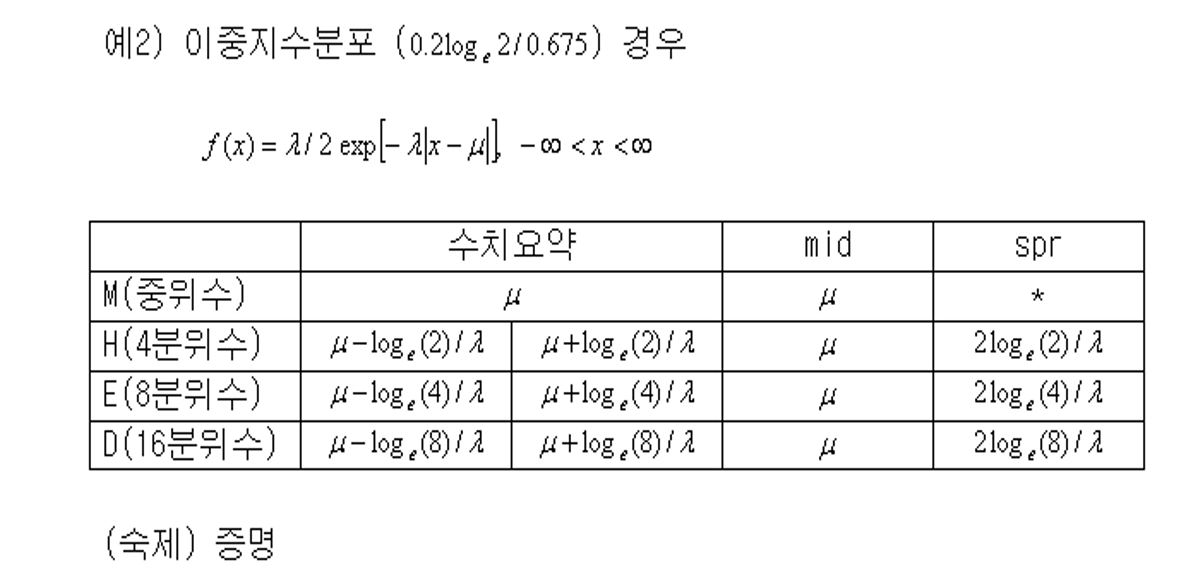

$f(x;\mu,\lambda) = \dfrac{\lambda}{2} exp[-\lambda|x-\mu|],\,\, -\infty < x < \infty$

에서 오른쪽 꼬리 확률은

$P\{X-\mu \geq \mu; \mu, \lambda\} = \dfrac{1}{2}exp[-\lambda \mu], \,\, 0 \geq < \infty$이다.

- `M(중앙값)` : 이중 지수 분포는 좌우대칭이므로 $M$(중위수)의 수치요약은 $\mu$이다. 단일 값이므로 산포는 없다.

- `H(4분위수)` : $\dfrac{1}{2}exp[-\lambda (H_U-\mu)] = \dfrac{1}{4}$를 $H_U$에 대하여 풀면, $H_U = \mu + \dfrac{ln(2)}{\lambda}$, 이중 지수 분포는 좌우대칭이므로 수치요약은 $(\mu - \dfrac{ln(2)}{\lambda}, \mu + \dfrac{ln(2)}{\lambda}$) 이다. 좌우대칭이므로 중앙값은 $\mu$이고, $\\$
산포는 $\mu + \dfrac{ln(2)}{\lambda} - \mu - \dfrac{ln(2)}{\lambda} = 2\dfrac{ln(2)}{\lambda}$이다.

- `E(8분위수)` : $\dfrac{1}{2}exp[-\lambda (H_U-\mu)] = \dfrac{1}{8}$를 $H_U$에 대하여 풀면, $H_U = \mu + \dfrac{ln(4)}{\lambda}$, 이중 지수 분포는 좌우대칭이므로 수치요약은 $(\mu - \dfrac{ln(4)}{\lambda}, \mu + \dfrac{ln(4)}{\lambda}$) 이다. 좌우대칭이므로 중앙값은 $\mu$이고, $\\$
산포는 $\mu + \dfrac{ln(4)}{\lambda} - \mu - \dfrac{ln(4)}{\lambda} = 2\dfrac{ln(4)}{\lambda}$이다.

- `D(16분위수)` : $\dfrac{1}{2}exp[-\lambda (H_U-\mu)] = \dfrac{1}{16}$를 $H_U$에 대하여 풀면, $H_U = \mu + \dfrac{ln(8)}{\lambda}$, 이중 지수 분포는 좌우대칭이므로 수치요약은 $(\mu - \dfrac{ln(4)}{\lambda}, \mu + \dfrac{ln(4)}{\lambda}$) 이다. 좌우대칭이므로 중앙값은 $\mu$이고, $\\$
산포는 $\mu + \dfrac{ln(8)}{\lambda} - \mu - \dfrac{ln(8)}{\lambda} = 2\dfrac{ln(8)}{\lambda}$이다.

# Problem 4

## 아래의 사이트의 예에서 프로그램을 실행하여 보고 그림에서 알 수 있는 것을 설명하여라.

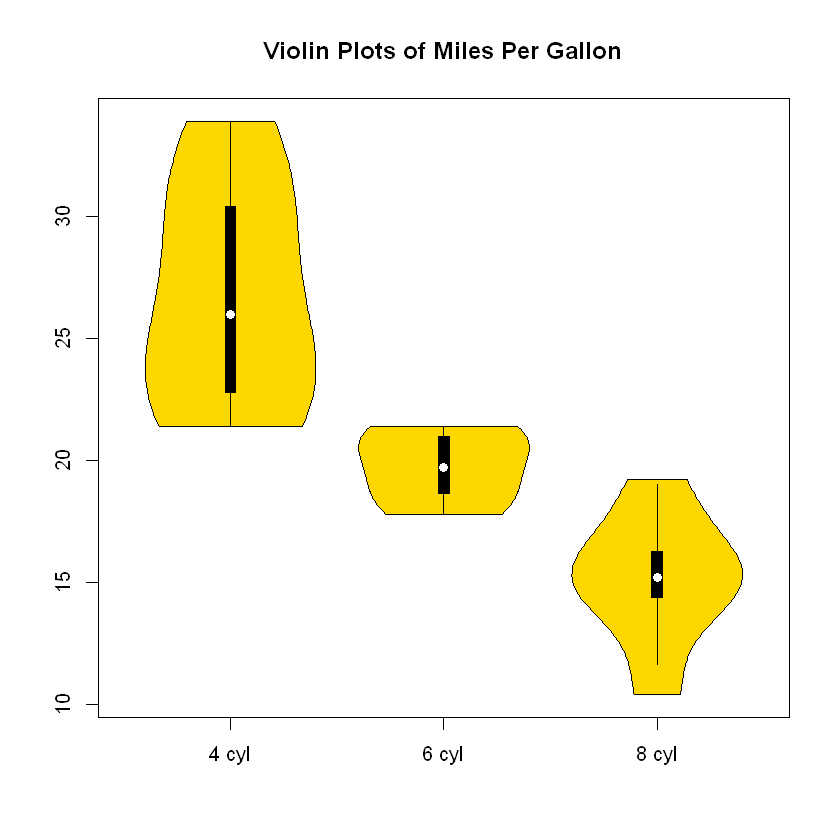

In [12]:
# Violin Plots
library(vioplot)
x1 <- mtcars$mpg[mtcars$cyl==4]
x2 <- mtcars$mpg[mtcars$cyl==6]
x3 <- mtcars$mpg[mtcars$cyl==8]
vioplot(x1, x2, x3, names=c("4 cyl", "6 cyl", "8 cyl"),
   col="gold")
title("Violin Plots of Miles Per Gallon")

위 `Violin Plots`에서 알 수 있는 점은 다음과 같다.

- `cyl` 값이 커짐에 따라서 `mpg` 값은 대체로 커진다.

- `4cyl`은 세 개의 데이터 중 가장 넓게 퍼져있다. 중앙값은 대략 26이다.

- `6cyl`은 데이터가 몰려 있다. 중앙값은 대략 20이다.

- `8cyl`은 대략 대칭인 종모양을 띄고 있다. 중앙값은 대략 15이다.

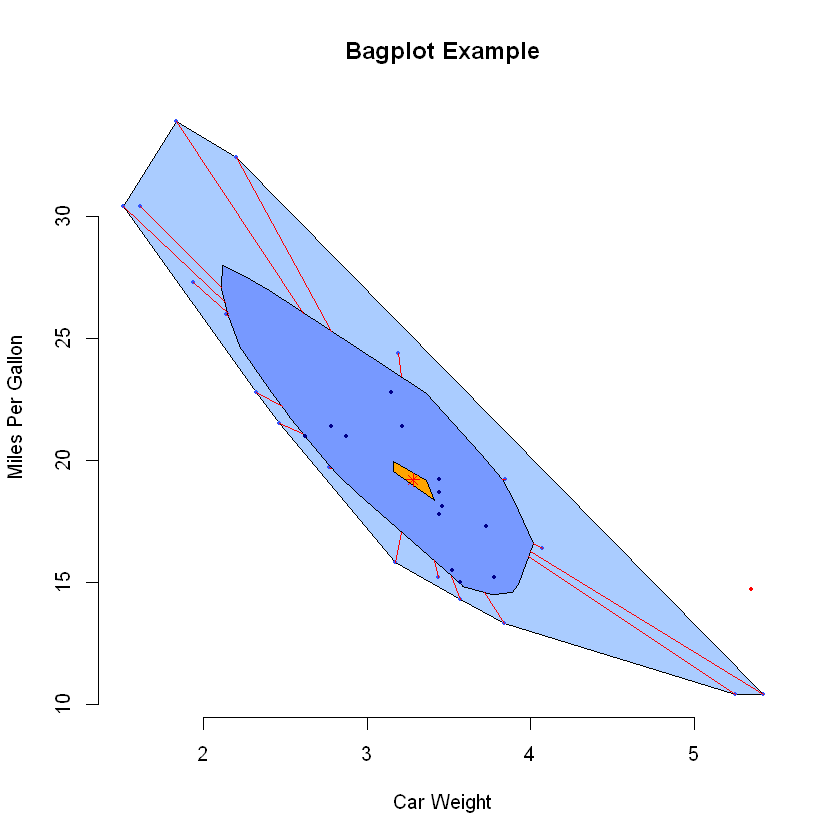

In [13]:
# Example of a Bagplot
library(aplpack)
attach(mtcars)
bagplot(wt,mpg, xlab="Car Weight", ylab="Miles Per Gallon",
  main="Bagplot Example")

위 `Bagplot`에서 알 수 있는 점은 다음과 같다.

- 이변량 버전의 상자그림

- 음의 상관관계를 띄고 있다. 즉, Car Weight가 커짐에 따라 Miles Per Gallon은 작아지는 경향성을 띈다.

- 내부 다각형 bag는 전체 데이터 중 50%를 담고 있다.

- 우측 하단에 이상점이 존재한다.

# Problem 5

## 전라북도 시와 군의 인구에 대한 상자 그림을 그리고 탐색하시오.

- 해당 자료의 출처는 `국가통계포털(kosis.kr) 인구, 가구 및 주택 - 읍면동(2015,2020), 시군구(2016~2019)` 입니다.

- 각 `시`와 `군`의 `읍면동`별 인구를 나타낸 자료입니다.

- 전주시의 완산구와 덕진구는 별도로 분리하지 않고 `읍면동`으로만 분리 하였습니다.

In [15]:
library(tidyverse)

In [16]:
# 데이터 전처리
population = read.csv('전라북도인구2020.csv', header = TRUE)
population = population[-1,] # header가 2개여서 하나가 남아 있었다. 삭제
names(population) = c('읍면동', '인구 수')

gg = c(population['읍면동'])[[1]]
index_s = grep('[시,군]$', gg) # 시, 군의 인덱스
diff_s = c(diff(index_s), 14)

new_population = cbind(rep(gg[index_s], diff_s), population) 
names(new_population) = c('시군', '읍면동', '인구')
new_population = new_population[-index_s,]

pps = c((new_population['읍면동'] == '완산구') %>% which, (new_population['읍면동'] == '덕진구') %>% which)
new_population = new_population[-pps,]
new_population[[3]] = as.numeric(new_population[[3]])

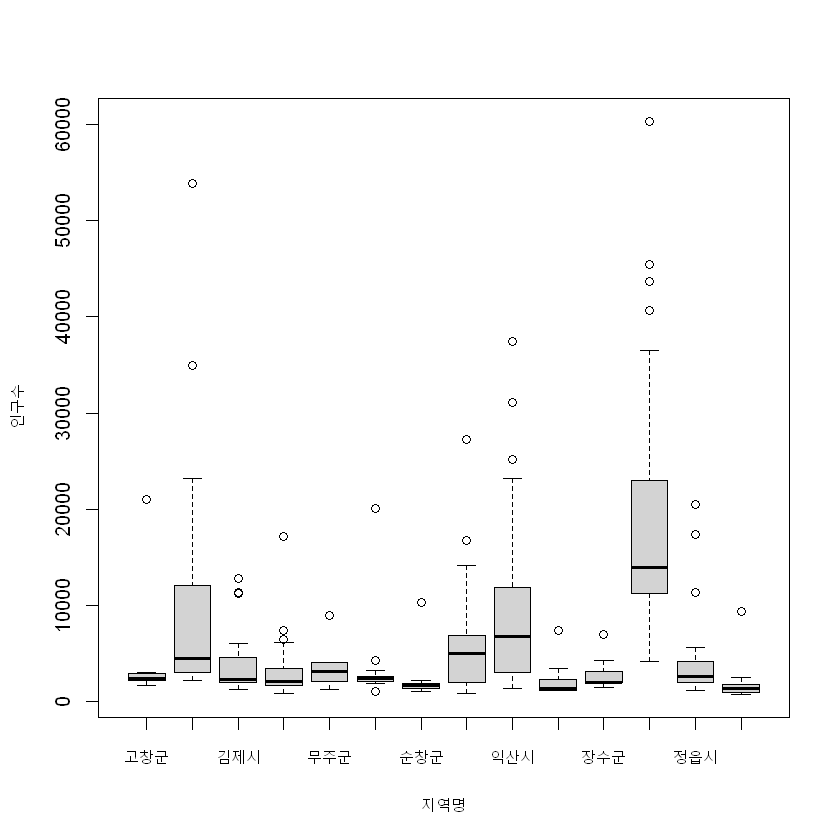

In [17]:
boxplot(new_population$인구 ~ new_population$시군,
       xlab = '지역명', ylab='인구수')

In [18]:
pop1_index = which(new_population[[1]] %in% c('전주시', '군산시', '익산시', '정읍시', '남원시', '김제시', '완주군'))
pop1 = new_population[pop1_index,]

pop2_index = which(new_population[[1]] %in% c('진안군', '무주군', '장수군', '임실군', '순창군', '고창군', '부안군'))
pop2 = new_population[pop2_index,]

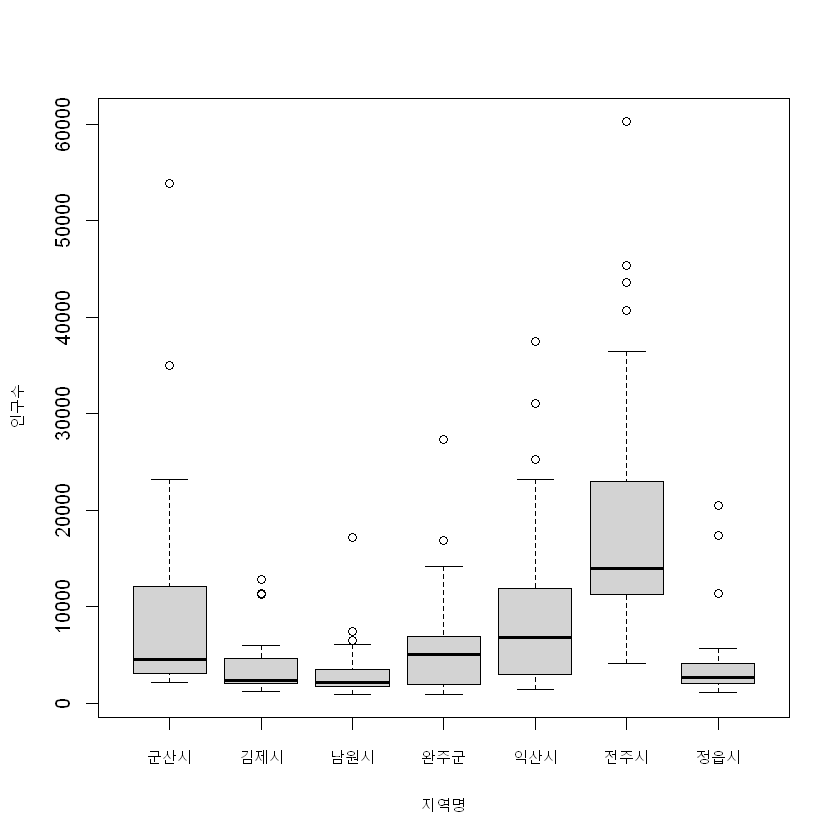

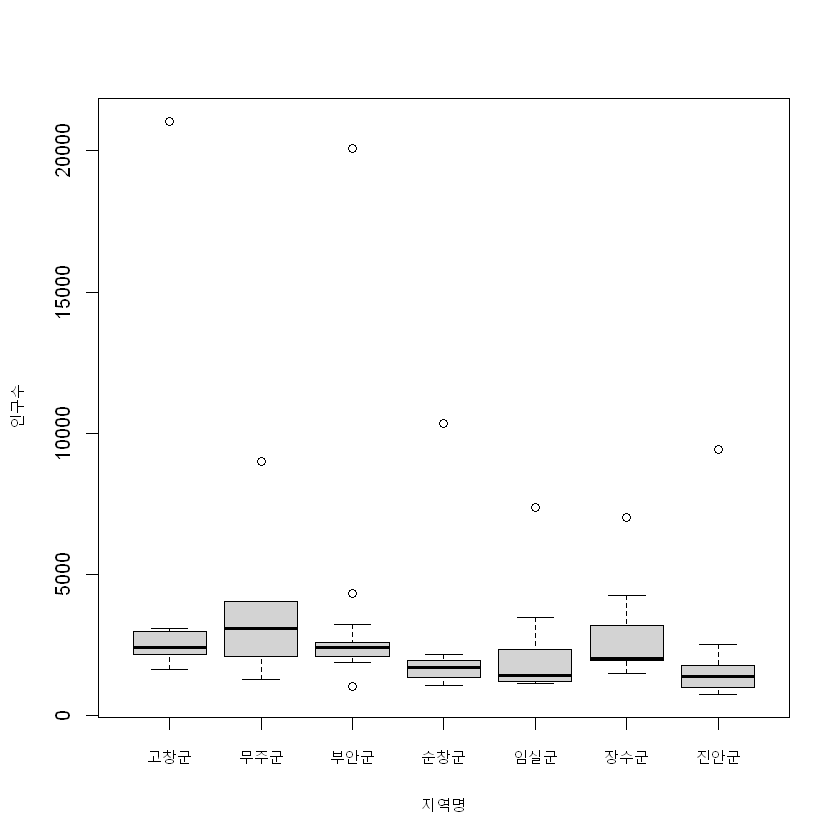

In [19]:
boxplot(pop1$인구 ~ pop1$시군, 
       xlab = '지역명', ylab='인구수')

boxplot(pop2$인구 ~ pop2$시군, 
       xlab = '지역명', ylab='인구수')

그래프 전체에서 상자 그림의 비중이 너무 적다.
`ylim`을 조정하여 보다 면밀하게 살펴보자.

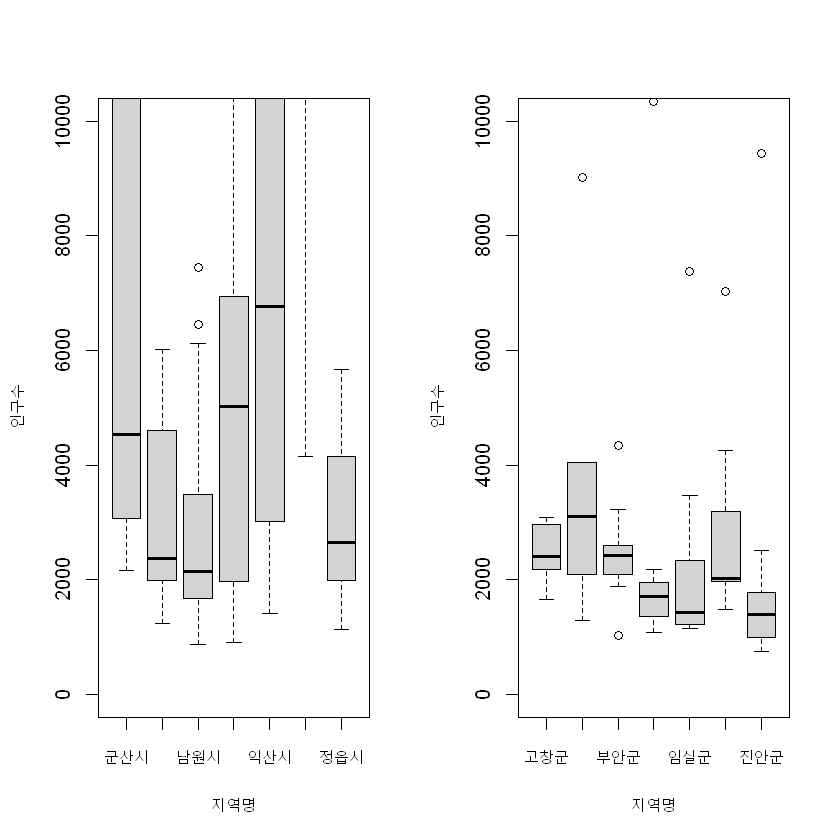

In [20]:
par(mfrow = c(1,2))

boxplot(pop1$인구 ~ pop1$시군, ylim = c(0, 10000),
       xlab = '지역명', ylab='인구수')

boxplot(pop2$인구 ~ pop2$시군, ylim = c(0, 10000),
       xlab = '지역명', ylab='인구수')

### 결론

구현한 상자그림을 탐색하여 아래와 같은 정보를 얻었다.

- `시`는 `군`에 비해서 대체로 인구수가 많다.

- 특히 `전주시`는 타 지역에 비해 압도적으로 인구수가 많다.

- `군산시`, `김제시`, `남원시`, `전주시`, `정읍시`는 오른쪽 꼬리가 긴 분포이다.

- 가장 큰 `읍면동`은 전주시에 있다.

- 이외에도 많은 정보를 얻을 수 있다.

# Problem 6

## Asia, Africa, Europe, N. America, Latin America, Oceania에 속하는 각각 나라들의 수도의 인구에 대한 상자그림을 그려 탐색하시오.


- 해당 자료의 출처는 국가통계포털 주요도시 인구(https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_2KAA203&conn_path=I2) 입니다.

In [21]:
getwd()

[1] "C:/Users/woo/Desktop/Project/class_2022EDA/Problem"

In [22]:
world_population = read.csv('world_capital_population.csv')

continent_name = c('아시아', '북아메리카', '남아메리카', '유럽', '아프리카', '오세아니아') 
index_continent = world_population[[1]] %in% continent_name %>% which

world_population = cbind(rep(continent_name, c(diff(index_continent), 3)), world_population)
names(world_population) = c('대륙', '국가(수도)', '인구')

world_population = world_population[-index_continent,]

In [23]:
world_population %>% head

,대륙,국가(수도),인구
,<chr>,<chr>,<int>
2,아시아,한국(서울),9602
3,아시아,아프가니스탄(카불),4222
4,아시아,아르메니아(예레반),1086
5,아시아,아제르바이잔(바쿠),2341
6,아시아,방글라데시(다카),21006
7,아시아,중국(베이징),20463


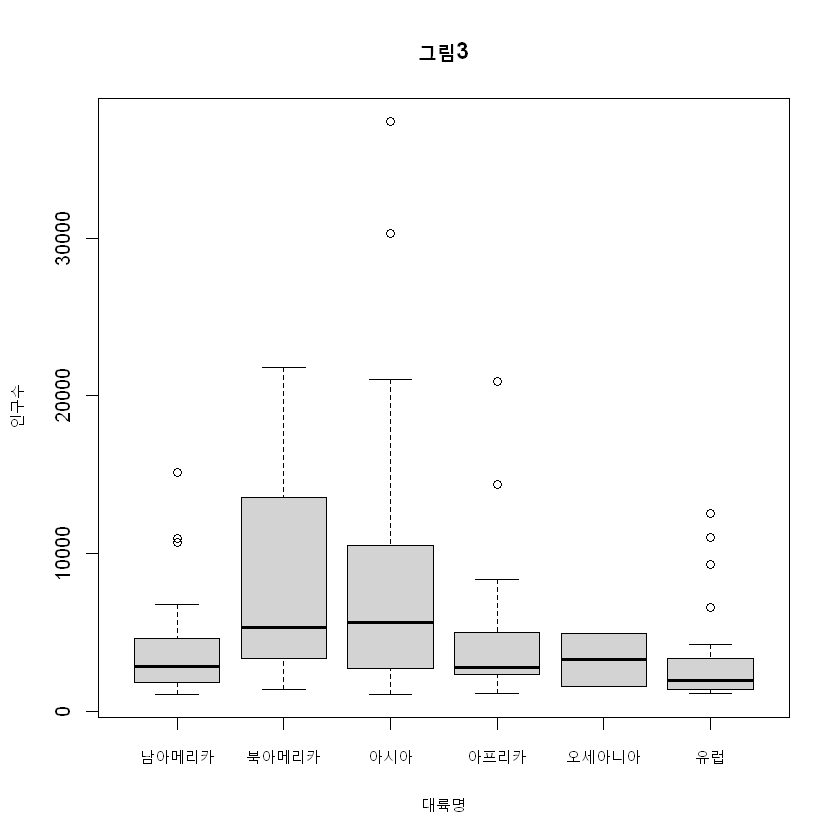

In [24]:
boxplot(world_population$인구 ~ world_population$대륙,
       xlab = '대륙명', ylab = '인구수', main ='그림3')

### 결론

구현한 상자그림을 탐색하여 아래와 같은 정보를 얻었다.

- 전 세계에서 수도 인구가 가장 많은 지역은 아시아에 있다.

- 산포로서 막대의 길이를 보면 북아메리카가 가장 크고 유럽이 가장 작다.

- 이외에도 많은 정보를 얻을 수 있다.